---

## Universidad de Costa Rica
### Escuela de Ingenier√≠a El√©ctrica
#### IE0405 - Modelos Probabil√≠sticos de Se√±ales y Sistemas

Segundo semestre del 2020

---

* Estudiante: **Karol Liseth Hern√°ndez Morera**
* Carn√©: **B63367**
* Grupo: **1**


# `P3` - *La demanda energ√©tica de electricidad en Costa Rica, parte II*

> Esta actividad extiende el an√°lisis y modelado realizados anteriormente sobre la demanda el√©ctrica del pa√≠s a partir de una base de datos del Instituto Costarricense de Electricidad del 2019. El √©nfasis ahora es encontrar las relaciones que existen entre los modelos de cada hora analizada.

---
* Elaboraci√≥n de nota te√≥rica y demostraci√≥n: **Jeaustin Sirias Chac√≥n**, como parte de IE0499 - Proyecto El√©ctrico: *Estudio y simulaci√≥n de aplicaciones de la teor√≠a de probabilidad en la ingenier√≠a el√©ctrica*.
* Revisi√≥n: **Fabi√°n Abarca Calder√≥n**


---
## 1. - Introducci√≥n

Ampliando el an√°lisis del Proyecto 2, ahora hacemos referencia a un **vector aleatorio** que contiene una familia de las variables aleatorias en cuesti√≥n. Es usual expresar este hecho como:

$$
\vec{X} = (X_1, X_2, X_3, \ldots, X_n)
$$

Hablar de un conjunto multidimensional $\vec{X}$ tiene ciertas implicaciones. Cuando un vector aleatorio tiene dos variables aleatorias es posible darle una interpretaci√≥n con un **sentido espacial**. Por ejemplo, sup√≥ngase que hay cierto vector aleatorio $\vec{V} = (X, Y)$ de dos dimensiones (puesto que, en efecto, hay dos variables aleatorias en $\vec{V}$). Hacer referecia ahora a un "plano" tiene sentido, en especial para evidenciar que cualquier par ordenado $(x_i, y_j)$ representa un punto aleatorio en el plano $XY$. 

Ahora bien, ¬øqu√© ocurre cuando $\vec{V}$ es $n$-dimensional?, ¬øpodr√≠a ser sencillo de manipular cinco o siete dimensiones, o es siquiera posible? Este proyecto programado se abordar√° desde un enfoque pr√°ctico para conocer las relaciones que existen en los datos de demanda energ√©tica.

---
## 2. - La librer√≠a `fitter` para la determinaci√≥n de modelos probabil√≠sticos

Hasta el momento en el curso se han encontrado los par√°metros de mejor ajuste entre un conjunto de datos (una "muestra") y un modelo probabil√≠stico particular, quiz√° elegido *arbitrariamente* o por un desarrollado sentido de la intuici√≥n, del tipo: "hmm, esa distribuci√≥n me parece exponencial". Sin embargo, est√° claro que algunos modelos hacen una mejor descripci√≥n de los datos que otros, y no siempre se puede encontrar "a puro ojo". 

En el proyecto anterior se construy√≥ una funcion programada espec√≠ficamente para hallar el modelo de mejor ajuste para una poblaci√≥n espec√≠fica de muestras, para evidenciar una aplicaci√≥n pr√°ctica de las variables aleatorias. Unas pocas distribuciones eran sometidas a prueba (distribuci√≥n normal, gamma, beta, Burr tipo XII, etc.) como candidatas al mejor modelo de ajuste; no obstante, el m√≥dulo `stats` de la biblioteca SciPy ofrece hasta 80 distribuciones distintas, y ser√≠a algo tedioso probarlas todas (y hasta brusco en t√©rminos del tiempo de ejecuci√≥n de Python). 

Para ello la biblioteca [`fitter`](https://fitter.readthedocs.io/en/latest/) ser√° introducida en esta ocasi√≥n. Tal cual su nombre lo indica (*ajustador*, en espa√±ol), esta herramienta provee m√≥dulos dedicados a probar todas las distribuciones de `stats`, concluyendo con "la mejor" distribuci√≥n y sus par√°metros de ajuste del mejor modelo. Los m√©todos a emplear del m√≥dulo `Fitter` (*Fitter* y *fitter* hacen referencia a t√©rminos distintos) son los siguientes:

```python
from fitter import Fitter # Invocaci√≥n de la clase Fitter

f = Fitter()              # Para instanciar la clase
f.fit()                   # Para evaluar las 80+ distribuciones
f.get_best()              # Para hallar el mejor modelo 
```

### 2.1. - Instalaci√≥n de `fitter`

Puede verificar si la librer√≠a est√° instalada en su computadora revisando la lista de paquetes de Python, en la terminal

```bash
pip list
```

Si no est√°, se puede instalar con

```bash
pip install fitter
```

---
## 3. - Funciones auxiliares

Es √∫til implementar ciertas funciones que simplifiquen las asignaciones a resolver, no obstante, se observar√° que algunas de ellas "heredan" caracter√≠sticas e instrucciones que conten√≠an las funciones en el anterior proyecto. 

### 3.1. - Funciones implementadas

Se contar√° con las siguientes funciones:

1. `extraer_datos(archivo_json, hora)`: Importa la base de datos completa y devuelve los datos de potencia a la hora indicada en un *array* de valores. Esta funci√≥n es id√©ntica a la del proyecto anterior.

* `distribucion_conjunta(X, Y, bins)`: Pide por par√°metros dos variables aleatorias, $X$ y $Y$, y el n√∫mero de divisones (`bins`) en el histograma. Visualiza un histograma bivariado y retorna los datos de la funci√≥n bivariada discreta en dos formatos distintos.

* `evaluar_modelos(datos)`: Encuentra la distribuci√≥n de mejor ajuste y retorna los par√°metros del modelo correspondiente para la muestra en `datos`.

* `densidad_marginal()`: 

* `energia_diaria(archivo_json)`: Importa la base de datos completa en formato **JSON** y calcula la energ√≠a diaria usando [la regla del trapecio](https://es.wikipedia.org/wiki/Regla_del_trapecio) y retorna un vector con muestras diarias de energ√≠a.

* `parametros_energia(vector_energia)`: Recibe por par√°metro un vector de energ√≠a diaria y retorna la media y la desviaci√≥n est√°ndar basadas en las muestras ingresadas.

Las llamadas a bibliotecas de Python de inter√©s para este proyecto programado son:

```python
# Para manipular datos de inter√©s y calcular resultados
import numpy as np 

# Para evaluar el modelo de mejor ajuste en una poblaci√≥n
from fitter import Fitter 

# Para manipular y leer la base de datos de demanda
import pandas as pd  

# La m√∫sica de la fiesta
from scipy import stats    

# Para visualizar resultados relevantes
import matplotlib.pyplot as plt  

# Para manipulaci√≥n de formatos temporales
from datetime import datetime    
```

#### 3.1.1. - Importaci√≥n y acondicionamiento con `extraer_datos`

In [93]:
import pandas as pd
import numpy as np
from datetime import datetime

def extraer_datos(archivo_json, hora):
    '''Importa la base de datos completa y devuelve los
    datos de potencia a la hora indicada en un
    array de valores.
    '''
    
    # Cargar el "DataFrame"
    df = pd.read_json(archivo_json) 
    
    # Convertir en un array de NumPy
    datos = np.array(df)                

    # Crear vector con los valores demanda en una hora
    demanda = []

    # Extraer la demanda en la hora seleccionada
    for i in range(len(datos)):
        instante = datetime.fromisoformat(datos[i][0]['fechaHora'])
        if instante.hour == hora:
            demanda.append(datos[i][0]['MW'])

    return demanda

#### 3.1.2. - Par√°metros y modelos de mejor ajuste con `distribucion_conjunta`

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def distribucion_conjunta(X, Y, bins):
    '''Pide por par√°metros dos variables aleatorias
    X y Y, as√≠ como el n√∫mero de 'bins' o divisiones
    a emplear para construir el histograma bivariado.
    Crea una gr√°fica y retorna dos tablas de datos de
    pares ordenados x, y y su probabilidad p asociada.
    '''
    np.seterr(all='ignore') # ignorar advertencias
    
    # Se inicializa la figura interactiva 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Se obtiene el plano de probabilidades para graficar el hist3D
    hist, xbins, ybins = np.histogram2d(X, Y, bins=bins, normed=False)
    hist = hist / sum(sum(hist))
    xbins = (xbins + np.roll(xbins, -1))[:-1] / 2.0 
    ybins = (ybins + np.roll(ybins, -1))[:-1] / 2.0 
    
    #Formatos de retorno para la funcion de densidad bivariada discreta
    xyp = [[xbins[i], ybins[j], hist[i][j]] for i in range(bins) for j in range(bins)]
    xy = hist 

    # Se construyen los arreglos para el ancho de Bins * Bins barras
    xpos, ypos = np.meshgrid(xbins, ybins, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Se dimensiona el ancho visual de las barras (como un s√≥lido).
    dx = dy = 30 * np.ones_like(zpos)
    dz = hist.ravel() 

    # Se visualiza el histograma 3D
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    ax.set_xlabel('La hora 1, $X$')
    ax.set_ylabel('La hora 2, $Y$')
    ax.set_zlabel('Probabilidad')
    plt.show()

    return xyp, xy, xbins, ybins
    

Obs√©rvese que la funci√≥n anterior retorna los datos de la funci√≥n bivariada sobre la base de las variables aleatorias $X$ y $Y$ en dos arreglos distintos `xyp` y `xy` con el objetivo de simplificar la manipulaci√≥n de datos en las actividades por realizar. Lucen de la siguiente forma:

**El formato `xyp`**

```python
    x   y      P
0  x1  y1  0.001
1  x1  y2  0.020
2  x1  y3  0.092
3  x2  y1  0.093
4  x2  y2  0.083
.   .   .    .
n   xn  yn   Pn
```

**El formato `xy`**

```python
      y1      y2      y3      y4    .   yn
x1  0.030  0.0400  0.0400  0.0400   .    .
x2  0.090  0.0056  0.0400  0.0860   .    .
x3  0.005  0.0450  0.0690  0.0010   .    .
x4  0.060  0.0230  0.0025  0.0014   .    .
.     .       .       .       .     .    .
xn    .       .       .       .     .    .
```

En ambos casos, independientemente, se puede interpretar los elementos $x_n$ y $y_n$ (las variables `xbins` y `ybins`) como los puntos medios de las divisiones por dimensi√≥n (`bins`). Para este caso ambas dimensiones tendr√°n siempre la misma cantidad de divisiones, por la forma en que ha programado la funci√≥n `distribucion_conjunta`.

#### 3.1.3. - Determinaci√≥n del modelo de mejor ajuste con `evaluar_modelos`

In [95]:
from fitter import Fitter

def evaluar_modelos(datos):
    '''Eval√∫a las 80 distribuciones del m√≥dulo stats
    y obtiene el el modelo de mejor ajuste para
    la demanda anual de una hora espec√≠fica. Retorna
    el nombre de la mejor distribuci√≥n y una tupla con
    los par√°metros del modelo.
    '''
    
    np.seterr(all='ignore') # ignorar advertencias
    
    # Hallar el mejor ajuste con Fitter
    f = Fitter(datos, timeout=120)
    f.fit()
    ajuste = f.get_best()
    
    for i in ajuste.keys():
        dist, params = i, ajuste[i]

    print('------------\nDistribuci√≥n\n------------')
    print(dist, '\n')
    print('----------\nPar√°metros\n----------')
    print(params)

    return dist, params

#### 3.1.4. - Comparaci√≥n de la densidad marginal y un modelo con `densidad_marginal`

In [96]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def densidad_marginal(xy, bins, dist, params, eje):
    '''Se elige eje='x' o eje='y' seg√∫n sea el caso para la 
    densidad marginal en Y o en X. El par√°metro 'xy' es la
    tabla de datos, 'bins' es el vector de valores de potencia 
    xbins o ybins. Los par√°metros 'dist' y 'params' corresponden
    al modelo de mejor ajuste retornado por el fitter.
    '''
    
    np.seterr(all='ignore') # ignorar advertencias
    
    # Hallar la densidad marginal de X o Y, seg√∫n se indique en 'eje'
    if eje == 'x':
        filas = len(xy)
        marginal = [sum(xy[i]) for i in range(filas)]
    elif eje == 'y':
        xy = xy.transpose()
        filas = len(xy)
        marginal = [sum(xy[i]) for i in range(filas)]

    # Visualizar modelo de mejor ajuste
    distro = getattr(stats, dist) 
    d = np.arange(min(bins)*0.96, max(bins)*1.04, 1)
    pdf_plot = distro.pdf(d, *params)
    plt.plot(d, pdf_plot*22, lw=3.5, color='r')
    
    # Visualizar funci√≥n de densidad marginal
    plt.bar(bins, marginal, width=12)
    plt.title('Contraste: densidad marginal vs. modelo de mejor ajuste')
    plt.xlabel('Potencia [MW]')
    plt.ylabel('Densidad Probabil√≠stica')
    plt.show()
    
    return marginal

#### 3.1.5. - Calculando el consumo diario y par√°metros relevantes con `energia_diaria`

In [97]:
import pandas as pd
import numpy as np
from datetime import datetime

def energia_diaria(archivo_json):
    '''Importa la base de datos completa y devuelve
    un vector con la energ√≠a diaria, en MWh.
    '''
    
    # Cargar el "DataFrame"
    df = pd.read_json(archivo_json) 

    # Convertir en un array de NumPy
    datos = np.array(df)  

    # Crear vector con todos los valores horarios de demanda
    demanda = []

    # Extraer la magnitud de la demanda para todas las horas
    for hora in range(len(datos)):
        instante = datetime.fromisoformat(datos[hora][0]['fechaHora'])
        demanda.append(datos[hora][0]['MW'])

    # Separar las magnitudes en grupos de 24 (24 h)
    demanda = np.split(np.array(demanda), len(demanda) / 24)

    # Crear vector para almacenar la enegia a partir de la demanda
    energia = []

    # Calcular la energia diaria por la regla del trapecio
    for dia in range(len(demanda)):
        E = round(np.trapz(demanda[dia]), 2)
        energia.append(E)

    return energia


#### 3.1.6. - Determinaci√≥n de par√°metros del consumo diario con `parametros_energia`

In [98]:
import numpy as np

def parametros_energia(vector_energia):
    '''Calcula los par√°metros media y desviaci√≥n
    est√°ndar en el vector de energ√≠a
    '''

    media = np.median(vector_energia)
    desviacion = np.std(vector_energia)

    return media, desviacion

### 3.2. - Probando las funciones implementadas

Ahora bien, se puede elaborar una breve demostraci√≥n pr√°ctica basada en las funciones anteriormente implementadas, haciendo sus respectivas llamadas:

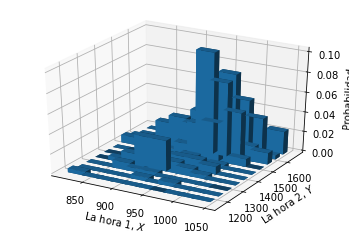

In [99]:
# Se eligen las dos horas que desean estudiarse
hora_1 = extraer_datos('demanda_2019.json', 3) 
hora_2 = extraer_datos('demanda_2019.json', 11) 

# Se ejecuta el an√°lisis bivariado
xyp, xy, xbins, ybins = distribucion_conjunta(hora_1, hora_2, bins = 10)

In [100]:
# Se llama obtiene los par√°metros de mejor ajuste para cada hora
dist, params = evaluar_modelos(hora_1)

# Nota: esta funci√≥n es de m√°s lenta ejecuci√≥n

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


------------
Distribuci√≥n
------------
genlogistic 

----------
Par√°metros
----------
(0.6318766353534495, 952.2292025622228, 19.795927564550382)


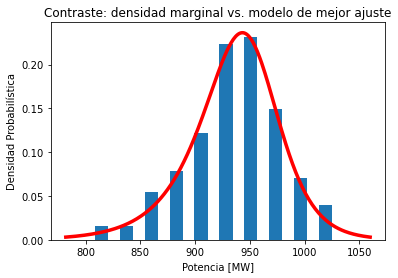

[0.01568627450980392,
 0.01568627450980392,
 0.054901960784313725,
 0.0784313725490196,
 0.12156862745098039,
 0.2235294117647059,
 0.23137254901960785,
 0.14901960784313723,
 0.07058823529411765,
 0.0392156862745098]

In [101]:
# Se contrasta la densidad marginal para cada hora, seg√∫n su eje
densidad_marginal(xy, xbins, dist, params, eje='x')

---
## 4. - Asignaciones del proyecto

El an√°lisis se har√° sobre dos horas distintas del d√≠a, elegidas de forma aleatoria. 

**Asignaci√≥n de horas**

La siguiente funci√≥n utiliza los d√≠gitos num√©ricos del carn√© de cada estudiante para asignar las horas con las que se construir√°n la variables aleatoria $X$ y la variable aleatoria $Y$. 

**Ejemplo**: el carn√© B12345 utiliza los d√≠gitos 12345 y obtiene las horas 19 y 7.

In [102]:
import random

def horas_asignadas(digitos):
    '''Elige una hora A en periodo punta
    y una hora B de los otros periodos,
    con los d√≠gitos del carn√© como "seed"
    '''
    
    random.seed(digitos)
    punta = [11, 12, 18, 19, 20]
    valle = [7, 8, 9, 10, 13, 14, 15, 16, 17]
    nocturno = [21, 22, 23, 0, 1, 2, 3, 4, 5, 6]
    otro = valle + nocturno
    HX = punta[random.randrange(0, len(punta))]
    HY = otro[random.randrange(0, len(otro))]
    horas = 'Hora X: {}, hora Y: {}'.format(HX, HY)
    return horas

In [103]:
mis_horas = horas_asignadas(63367)
print(mis_horas)

# Bonus: los "docstrings" y la funci√≥n help()
help(horas_asignadas)

Hora X: 12, hora Y: 9
Help on function horas_asignadas in module __main__:

horas_asignadas(digitos)
    Elige una hora A en periodo punta
    y una hora B de los otros periodos,
    con los d√≠gitos del carn√© como "seed"



### 4.1. - Funci√≥n distribuci√≥n m√∫ltiple bivariada

Es posible analizar una variable aleatoria en relaci√≥n con otra. Para empezar, se puede visualizar su comportamiento "conjunto".

* (10%) Visualice los datos de la variable aleatoria m√∫ltiple a las dos horas elegidas, en la forma de un histograma conjunto.
* (15%) Determine las funciones de densidad marginales $f_X(x)$ y $f_Y(y)$ a partir de los datos y utilizando un modelo de mejor ajuste.
* (10%) Determine los valores esperados $E[X]$ y $E[Y]$ de los datos.

En este proyecto no deduciremos la *funci√≥n de densidad conjunta*, que en general necesita de otros m√©todos num√©ricos para encontrar una expresi√≥n algebraica.

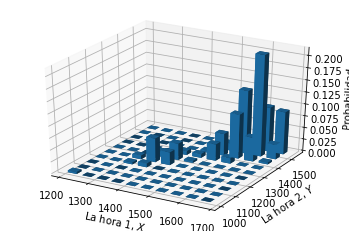

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4522: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


------------
Distribuci√≥n
------------
johnsonsu 

----------
Par√°metros
----------
(1.7130748784740093, 1.3492318786794109, 1644.3259347008984, 46.32082763663503)


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4522: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1715: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


------------
Distribuci√≥n
------------
foldcauchy 

----------
Par√°metros
----------
(39.90076470238408, -0.20752995983048114, 36.27042598807426)


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4522: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


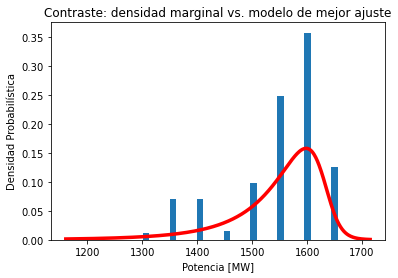

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4522: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


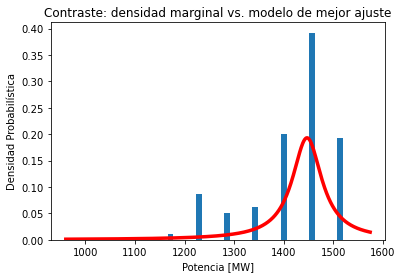

Consumo energ√©tico promedio para las 12 p.m: 1545.0704 MWh 

Consumo energ√©tico promedio para las 9 a.m: 1415.9760 MWh 



In [104]:
# 4.1. - Funci√≥n distribuci√≥n m√∫ltiple bivariada

#----------------------- Parte 4.1.1 ------------------------------------------------------

# Se eligen las dos horas que desean estudiarse
hora_1 = extraer_datos('demanda_2019.json', 12) 
hora_2 = extraer_datos('demanda_2019.json', 9) 

# Se ejecuta el an√°lisis bivariado para la  visualizaci√≥n de las variables m√∫ltiples de las dos horas

xyp, xy, xbins, ybins = distribucion_conjunta(hora_1, hora_2, bins = 10)

#----------------------- Parte 4.1.2 ------------------------------------------------------

# Se llama obtiene los par√°metros de mejor ajuste para cada hora

dist, params = evaluar_modelos(hora_1)    # Par√°metros para la hora_1 (12p.m)  

dist2, params2 = evaluar_modelos(hora_2)  # Par√°metros para la hora_2 (9 a.m)  

# Se contrasta la densidad marginal para cada hora, seg√∫n su eje

densidad_marginal(xy, xbins, dist, params, eje='x')

densidad_marginal(xy, ybins, dist2, params2, eje='y')


#----------------------- Parte 4.1.3 ------------------------------------------------------

# La media para la hora 1 (12 p.m)  

EX_h1 = np.mean(hora_1)
print('Consumo energ√©tico promedio para las 12 p.m: {:0.4f}'.format(EX_h1) ,"MWh", "\n")


# La media para la hora 2 (9 a.m)

EY_h2 = np.mean(hora_2)
print('Consumo energ√©tico promedio para las 9 a.m: {:0.4f}'.format(EY_h2) ,"MWh", "\n")



### 4.2. - Correlaci√≥n entre el consumo a distintas horas del d√≠a

¬øUn alto consumo de potencia a la hora $X$ est√° correlacionado con un alto consumo de potencia a la hora $Y$ del mismo d√≠a? Esta pregunta puede abordarse con las m√©tricas de correlaci√≥n y covarianza entre dos variables aleatorias.

* (15%) Calcule la correlaci√≥n entre $X$ y $Y$, $E[XY] = R_{XY}$. Para esto, puede utilizar los datos provistos y la versi√≥n discreta de la f√≥rmula de correlaci√≥n, dada por $$\begin{aligned} R_{XY} = m_{11} & = E[XY] \\ & = \sum_{x=-\infty}^{\infty} \sum_{y=-\infty}^{\infty} x y ~ p(x, y) \end{aligned}$$ donde $p(x, y)$ son las probabilidades asociadas a cada par $(x, y)$.
* (10%) ¬øEst√°n correlacionadas estas variables? Recordar que la prueba de correlaci√≥n es $E[XY] = E[X]E[Y]$ (puede aplicar una tolerancia del 5%).
* (10%) Determine la covarianza y el √≠ndice de correlaci√≥n de Pearson.
* (10%) An√°lisis: ¬øqu√© implica este valor del √≠ndice de correlaci√≥n de Pearson?

In [105]:
# 4.2. - Correlaci√≥n entre el consumo a distintas horas del d√≠a

#----------------- Parte 4.2.1 --------------------------------------------------

# Dado que la ùëÖùëãùëå = ùëö11= ùê∏[ùëãùëå], la sumatoria implica que se de Xn*Yn*p(x,y), se procede a obtener las variables:  

R_xy= 0        # Variable para obtener los valores de R_xy
vx_n=[]        # Vector para los valores Xn
vy_n= []       # Vector para los valores Yn
for i in xyp:   
    R_xy+= i[0]*i[1]*i[2]   # Xn*Yn*p(x,y) para cada fila de la matriz xyp
    vx_n.append(i[0])       # Se agregan los valores de Xn a la tupla vx_n
    vy_n.append(i[1])       # Se agregan los valores de Yn a la tupla vy_n

print('La correlaci√≥n entre ùëã y ùëå, ùê∏[ùëãùëå]= ùëÖùëãùëå es: {:0.4f}'.format (R_xy) ,"\n")

#----------------- Parte 4.2.2--------------------------------------------------

#  ùê∏[ùëãùëå]= ùê∏[ùëã]ùê∏[ùëå]  

E_XY = EY_h2 *EX_h1 #Se realiza la ecuaci√≥n anterior para realizar el c√°lculo 

# Valor de E[XY] = E[X]E[Y]

print('El valor E[XY] es: {:0.4f}'.format(E_XY), "\n")

Tol= abs(((R_xy)-E_XY)/(R_xy))*100

print('Tolerancia de la prueba de correlaci√≥n es de: {:0.4f}'.format(Tol) , "%" "\n")


#----------------- Parte 4.2.3 --------------------------------------------------

#COVARIANZA
#Se sabe que RXY= E[XY].
# Si RXY = E[X]E[Y] no est√°n correlacionadas. Si RXY=0 son ortogonales

C_xy = R_xy - E_XY  # F√≥rmula para calcular la covarianza a partir de los valores anteriormente obtenidos

print('La covarianza es de: {:0.4f}'.format(C_xy), "\n")  

# C√°lculo de la desviaci√≥n para los valores de Xn y Yn

desviacionH_1= np.std(vx_n)

desviacionH_2= np.std(vy_n)

# √çndice de correlaci√≥n de Pearson

pear =C_xy/(desviacionH_1*desviacionH_2) # Ecuaci√≥n para obtener el valor del √≠ndice de Pearson

print('El √≠ndice de correlaci√≥n de Pearson tiene un valor de: {:0.4f}'.format(pear), "\n")


La correlaci√≥n entre ùëã y ùëå, ùê∏[ùëãùëå]= ùëÖùëãùëå es: 2197011.0096 

El valor E[XY] es: 2187782.7097 

Tolerancia de la prueba de correlaci√≥n es de: 0.4200 %

La covarianza es de: 9228.2999 

El √≠ndice de correlaci√≥n de Pearson tiene un valor de: 0.4004 




#### -------------------------------------- Parte 4.2.4 --------------------------------------------------

El coeficiente de correlaci√≥n de Pearson corresponde a una medida de correspondencia o relaci√≥n lineal entre dos variables cuantitativas aleatorias, es decir, un √≠ndice empleado para medir el grado de relaci√≥n que tienen las dos variables, involucradas. 
El valor del coeficiente indica como se comportan los sucesos respecto a las dos variables, entre m√°s relaci√≥n tengan, m√°s
cercano debe ser el valor a 1. Los valores est√°n en un intervalo entre 0 y 1, o sino -1, seg√∫n el dato obtenido (0.4004) hay una correlaci√≥n positiva, esto quiere decir que las dos variables se correlacionan en un sentido directo. Sin embargo, √≠ndice en este caso demuestra que no posee una relaci√≥n muy alta entre las variables aleatorias, pero si existe una correspondencia aceptable.


### 4.3. - An√°lisis de consumo de energ√≠a semanal

Semana a semana hay un consumo total de **energ√≠a** en el pa√≠s. Este valor cambia aleatoriamente, pero, ¬øser√° posible modelar su distribuci√≥n de probabilidad? M√°s a√∫n, ¬øes posible predecir su distribuci√≥n utilizando el teorema del lim√≠te central y el conocimiento del consumo *diario* de energ√≠a?

Si el consumo de energ√≠a de *cada d√≠a de la semana* es una variable aleatoria $E_L, E_K, \ldots, E_D$, entonces el consumo total semanal est√° dado por:

$$
S_E = E_L + E_K + E_M + E_J + E_V + E_S + E_D
$$

El teorema del l√≠mite central para la suma, en la versi√≥n estudiada, aplica para la suma de variables aleatorias **iid** (*independientes e id√©nticamente distribuidas*). Esta suposici√≥n **no** aplica para los datos estudiados dado que, por ejemplo, el consumo del lunes no es el mismo que el del domingo. Sin embargo, se har√° la aproximaci√≥n con unos par√°metros √∫nicos $\mu$ (la media) y $\sigma$ (la desviaci√≥n est√°ndar) para la energ√≠a consumida durante todos los d√≠as del a√±o.

Conocidos estos par√°metros y considerando "razonablemente grande" la cantidad de elementos en la suma $N = 7$, el teorema establece que

$$
Z = \frac{S_E - \mu_{S_E}}{\sigma_{S_E}} = \frac{S_N - N\mu}{\sigma \sqrt{N}}
$$

tendr√° una distribuci√≥n $Z \sim \mathcal{N}(0, 1)$, es decir, normal estandarizada.

* (20 %) Eval√∫e la hip√≥tesis descrita. Comente los resultados.

Para esto puede crear un histograma con los resultados del consumo de energ√≠a *semanal*. Puede adem√°s calcular los par√°metros $\mu$ (la media) y $\sigma$ (la desviaci√≥n est√°ndar) de la energ√≠a diaria consumida y estimar la distribuci√≥n de $S_E$.

Media de la energ√≠a diaria consumida es de:30025.1449  

Desviaci√≥n est√°ndar de la energ√≠a diaria consumida es de: 1765.1915 

Valores de energ√≠a por semana : [196639.91, 205098.05, 207571.61000000002, 211580.34, 211151.75, 211033.33000000002, 216684.22999999995, 215959.83, 210868.72, 214254.36, 217155.32, 216131.03999999998, 217819.94999999995, 217655.0, 217173.68, 197143.05000000005, 219742.43000000002, 217754.75, 215779.16, 213103.41999999998, 207394.19, 207773.81999999998, 211003.59, 208934.3, 214083.45, 207153.25000000003, 206916.72999999998, 204680.6, 209445.83, 203739.86000000002, 207134.22999999998, 208136.80000000002, 197783.1, 207513.27000000002, 208357.68000000002, 205188.79] 

El valor de la distribuci√≥n Z es de: -0.1707


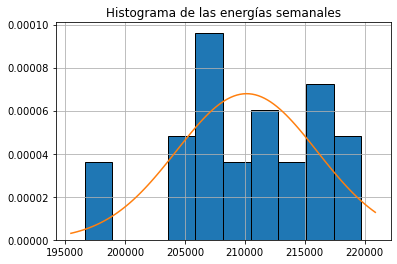

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4522: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4522: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


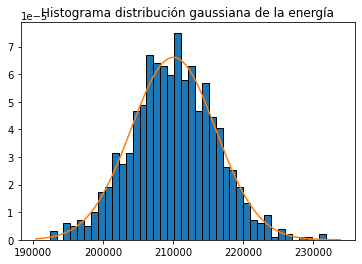

Media de la distribuci√≥n gaussiana:  210037.22783566607


In [118]:
# 4.3. - An√°lisis de consumo de energ√≠a semanal

import math 

# Se extraen los valores de la energ√≠a 
energias= energia_diaria('demanda_2019.json')

#---------------------------------------------------------------------------------------------------------------

# ùúá  (la media) del consumo diario
med= np.mean(energias)
print("Media de la energ√≠a diaria consumida es de:{:0.4f} ".format( med),"\n")

#---------------------------------------------------------------------------------------------------------------

# ùúé (la desviaci√≥n est√°ndar) del consumo diario
desv= np.std(energias)
print("Desviaci√≥n est√°ndar de la energ√≠a diaria consumida es de: {:0.4f}".format(desv),"\n")

#---------------------------------------------------------------------------------------------------------------

# Se obtiene la energ√≠a de cada semana, durante 36 semanas (252 d√≠as).

L=0 
D=7

Esemanal =[]
for i in range(36):
    
    Esemanal.append(sum(energias[L:D]))
    L+=7
    D+=7

print("Valores de energ√≠a por semana :", Esemanal,"\n")

#---------------------------------------------------------------------------------------------------------------
    
# Se obtiene la distribuci√≥n Z para cada semana

d_Z =[]
N=7
for z in Esemanal:
    d_Z.append((z-N*med)/(desv*math.sqrt(N))) # (ùëÜùëÅ‚àíùëÅùúá) / ùúéùëÅ
    
Ztotal = sum(d_Z)   

print("El valor de la distribuci√≥n Z es de: {:0.4f}".format(Ztotal))
 
#---------------------------------------------------------------------------------------------------------------

# Histograma de las energias semanales

from scipy.stats import norm
import matplotlib.pyplot as plt

plt.title('Histograma de las energ√≠as semanales')
med, desv=norm.fit(Esemanal)
plt.hist(Esemanal, edgecolor = 'black',density = True  )
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, med, desv)
plt.plot(x, y)
plt.grid()
plt.show()
plt.clf()

# Histograma de las energias semanales para la distribuci√≥n gaussiana

loc=med
scale = desv
alea= np.random.normal(loc, scale , size=1000)
mean,std=norm.fit(alea)
plt.title('Histograma distribuci√≥n gaussiana de la energ√≠a')
plt.hist(alea, edgecolor = 'black', bins=40, density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()

media= np.mean(alea)


print("Media de la distribuci√≥n gaussiana: ",media)

#### -------------------------------------- Parte 4.3 --------------------------------------------------
Se observa en el histograma de la distribuci√≥n gaussiana correspondiente a la $normal$ (dado que es la que presenta la distribuci√≥n Z), de acuerdo a esta la media est√° alrededor de 210.000, conforme la hip√≥tesis que se asumi√≥, de que s√≠ se puede determinar el comportamiento del consumo, mediante una distribuci√≥n, se puede afirmar que es correcta, puesto que se puede observar que los resultados coinciden si se saca la media por semana $(30025.1449*7= 210176,0143)$ de los datos ya proporcionados por el ICE, si se toman como par√°metros para una con valores aleatorios el comportamiento de la media es muy similar $(210037.2278)$, tomando en cuenta la aleatoriedad de las variables de acuerdo a la energ√≠a consumida cotidianamente.



---

### Universidad de Costa Rica
#### Facultad de Ingenier√≠a
##### Escuela de Ingenier√≠a El√©ctrica

---